## Data Analysis 1: U-test

**Extracting Positive and Negative Reviews for U-test**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

transformed_reviews_df = pd.read_csv("transformed_reviews.csv") # Read the csv file

neg_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'NEGATIVE']
pos_reviews = transformed_reviews_df[transformed_reviews_df['SentimentLabels'] == 'POSITIVE']

neg_numerator = neg_reviews['HelpfulnessNumerator'] # Extract the helpfulness numerator values
pos_numerator = pos_reviews['HelpfulnessNumerator']  

print(pos_reviews.shape)
print(neg_reviews.shape)

(5029, 9)
(1789, 9)


**Normality Test**

Positive reviews normality test p-value: 1.6440828823492908e-162
Negative reviews normality test p-value: 1.3392323863178284e-49


Positive reviews normality test p-value after sqrt transform: 8.980273349914406e-123
Negative reviews normality test p-value after sqrt transform: 6.100861770336597e-70


Text(0.5, 0, 'Helpfulness Numerator Value')

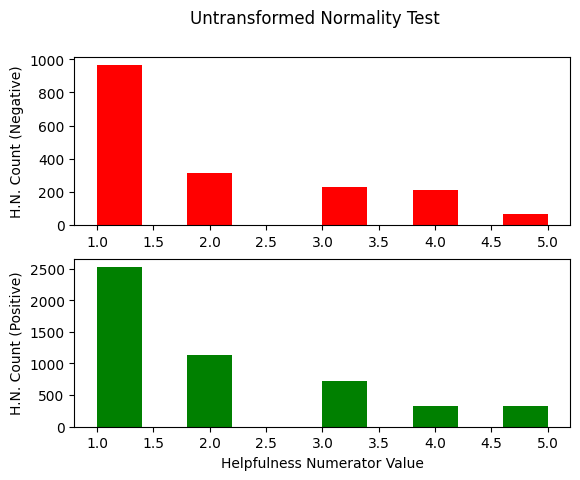

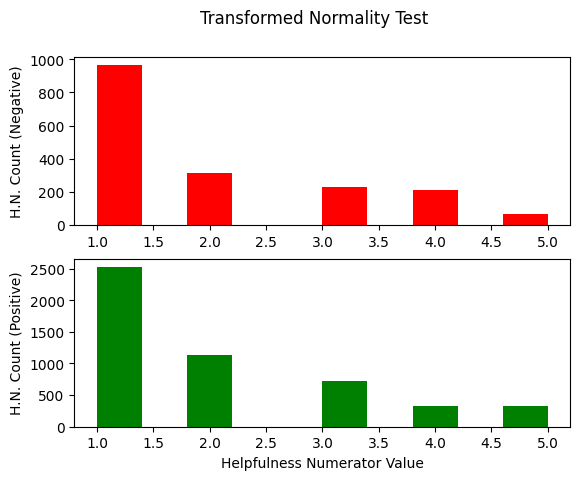

In [2]:
# Perform normality test
neg_num_normal = stats.normaltest(neg_numerator)
pos_num_normal = stats.normaltest(pos_numerator)
print("Positive reviews normality test p-value:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value:", neg_num_normal.pvalue)
print("\n")

fig, histo = plt.subplots(2)
fig.suptitle('Untransformed Normality Test')
histo[0].hist(neg_numerator, color='red')
histo[0].set_ylabel('H.N. Count (Negative)')
histo[1].hist(pos_numerator, color='green')
histo[1].set_ylabel('H.N. Count (Positive)')
histo[1].set_xlabel('Helpfulness Numerator Value')

# Apply squareroot transformation
pos_numerator_sqrt = np.sqrt(pos_numerator)  
neg_numerator_sqrt = np.sqrt(neg_numerator)

# Perform normality test again
pos_num_normal = stats.normaltest(pos_numerator_sqrt)
neg_num_normal = stats.normaltest(neg_numerator_sqrt)
print("Positive reviews normality test p-value after sqrt transform:", pos_num_normal.pvalue)
print("Negative reviews normality test p-value after sqrt transform:", neg_num_normal.pvalue)

fig, histo = plt.subplots(2)
fig.suptitle('Transformed Normality Test')
histo[0].hist(neg_numerator, color='red')
histo[0].set_ylabel('H.N. Count (Negative)')
histo[1].hist(pos_numerator, color='green')
histo[1].set_ylabel('H.N. Count (Positive)')
histo[1].set_xlabel('Helpfulness Numerator Value')


**Equal Variance Test**

In [3]:
# Perform the equal variance test
ev_test = stats.levene(pos_numerator, neg_numerator)
print("Levene's test p-value:", ev_test.pvalue)

Levene's test p-value: 0.5349815158156421


**Perform U-test**

In [4]:
u_stat, p_val = stats.mannwhitneyu(pos_numerator, neg_numerator)
print(pos_numerator.mean(), pos_numerator.std()) # Positive numerator mean and std
print(neg_numerator.mean(), neg_numerator.std()) # Negative numerator mean and std
print("p_val:", p_val)

1.9598329687810698 1.2151167855987954
1.9390721073225266 1.2165798273608066
p_val: 0.19243171000293802
